In [4]:
%matplotlib inline
import pymc3 as pm
import numpy as np
import matplotlib.pyplot as plt
import arviz as az

plt.style.use('seaborn-darkgrid')
print('Running on PyMC3 v{}'.format(pm.__version__))

Running on PyMC3 v3.8


# Autoregressive model

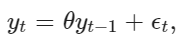

# importing data

In [8]:
import pandas as pd

data = pd.read_csv("./EUR_USD_data.csv")
print(data[:-1])
# X=data.as_matrix(columns=['Price'])
# price=np.reshape(X,1328)
# plt.plot(price)

           Date   Price    Open    High     Low  per_change  Days
0     28-Oct-14  1.2734  1.2698  1.2765  1.2683      0.0028     0
1     29-Oct-14  1.2632  1.2735  1.2772  1.2631     -0.0080     1
2     30-Oct-14  1.2613  1.2631  1.2640  1.2547     -0.0015     2
3     31-Oct-14  1.2525  1.2612  1.2618  1.2485     -0.0070     3
4      3-Nov-14  1.2483  1.2515  1.2517  1.2441     -0.0034     4
...         ...     ...     ...     ...     ...         ...   ...
1322  21-Nov-19  1.1059  1.1074  1.1098  1.1052     -0.0013  1322
1323  22-Nov-19  1.1024  1.1059  1.1087  1.1015     -0.0032  1323
1324  25-Nov-19  1.1014  1.1024  1.1033  1.1003     -0.0009  1324
1325  26-Nov-19  1.1020  1.1014  1.1027  1.1007      0.0005  1325
1326  27-Nov-19  1.1005  1.1022  1.1022  1.0992     -0.0014  1326

[1327 rows x 7 columns]


# defining model for price

this is an AR2 model hence it considers two previous steps and has two values for beta 

In [6]:
tau = 1.0

with pm.Model() as arprice:
    beta0 = pm.Normal('beta0', mu=0, sigma=tau)
    beta1 = pm.Normal('beta1',  mu=0, sigma=tau)
    likelhood = pm.AR('price', [beta0, beta1], sigma=1.0, observed=price)

## sampling from the trace 

In [7]:
with arprice:
    trace = pm.sample(2000, tune=4000, cores=4)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta1, beta0]
Sampling 4 chains, 0 divergences: 100%|██████████| 24000/24000 [01:11<00:00, 334.76draws/s]
The acceptance probability does not match the target. It is 0.5971076145505472, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8881608982666491, but should be close to 0.8. Try to increase the number of tuning steps.
The number of effective samples is smaller than 25% for some parameters.


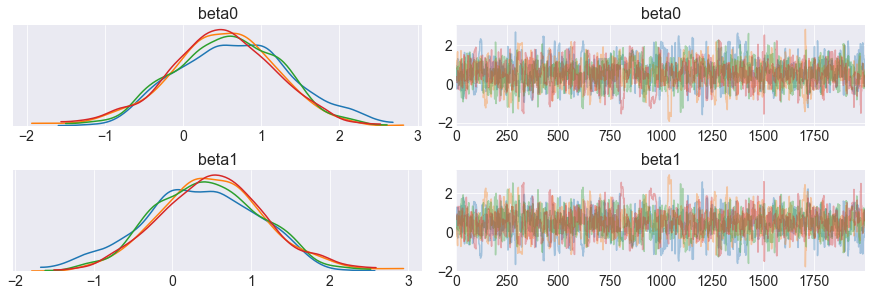

In [9]:
az.plot_trace(trace);

In [10]:
pmup = ((price[:-1]**2).sum() + tau**-2)**-1 * np.dot(price[:-1],price[1:])
pVp =  ((price[:-1]**2).sum() + tau**-2)**-1

print('Mean(beta0): {:5.3f}, Mean(beta1): {:5.3f}'.format(trace['beta0'].mean(), trace['beta1'].mean()))
print('Std(beta0): {:5.3f}, Std(beta0): {:5.3f}'.format(trace['beta0'].std(), trace['beta1'].std()))

Mean(beta0): 0.547, Mean(beta1): 0.452
Std(beta0): 0.692, Std(beta0): 0.691


# checking price accuracy of answer

In [11]:
import pandas as pd

data_test = pd.read_csv("./EUR_USD_test.csv")
data_test=data_test[:-6]
# print(data_test['Price'][-2:])
y1=1.1005
y2=1.1020

predict_price= trace['beta0'].mean()*y1+trace['beta1'].mean()*y2
print("predicted price = ",predict_price)
print("actual price = ",data_test['Price'][-1:])

predicted price =  1.1002358613232275
actual price =  4    1.1009
Name: Price, dtype: float64


# same process has been conducted for the remaining variables

# Data for High

C:\Users\DELL\Anaconda3\envs\pp\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


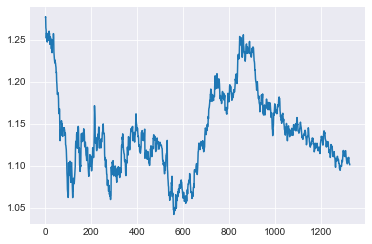

In [13]:
X=data.as_matrix(columns=['High'])
high=np.reshape(X,1328)
plt.plot(high)

# applying Model

In [17]:
tau = 1.0
with pm.Model() as arhigh:
    beta0 = pm.Normal('beta0', mu=0, sigma=tau)
    beta1 = pm.Normal('beta1',  mu=0, sigma=tau)
    likelhood = pm.AR('high', [beta0, beta1], sigma=1.0, observed=high)

In [18]:
with arhigh:
    trace = pm.sample(1000, tune=4000, cores=4)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta1, beta0]
Sampling 4 chains, 0 divergences: 100%|██████████| 20000/20000 [01:02<00:00, 320.78draws/s]
The acceptance probability does not match the target. It is 0.715120555245827, but should be close to 0.8. Try to increase the number of tuning steps.
The number of effective samples is smaller than 25% for some parameters.


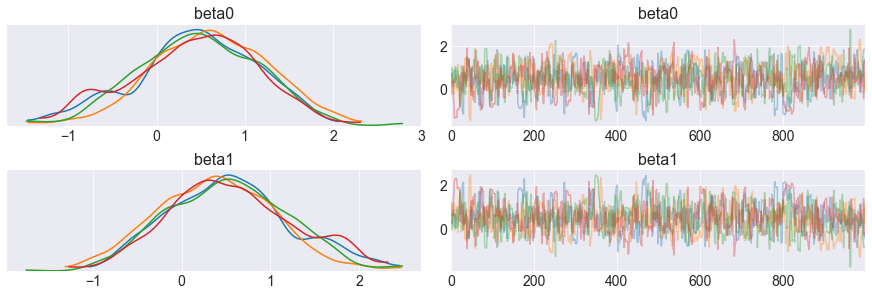

In [19]:
az.plot_trace(trace);

In [20]:
hmup = ((high[:-1]**2).sum() + tau**-2)**-1 * np.dot(high[:-1],high[1:])
hVp =  ((high[:-1]**2).sum() + tau**-2)**-1

print('Mean(beta0): {:5.3f}, Mean(beta1): {:5.3f} '.format(trace['beta0'].mean(), trace['beta1'].mean(),hmup))
print('Std(beta0): {:5.3f}, Std(beta0): {:5.3f} '.format(trace['beta0'].std(), trace['beta1'].std(),np.sqrt(hVp)))

Mean(beta0): 0.494, Mean(beta1): 0.505 
Std(beta0): 0.689, Std(beta0): 0.688 


# Checking accuracy

In [21]:
import pandas as pd

data_test = pd.read_csv("./EUR_USD_test.csv")
data_test=data_test[:-6]
# print(data_test['Price'][-2:])
y1=1.1022
y2=1.1027

predict_price= trace['beta0'].mean()*y1+trace['beta1'].mean()*y2
print("predicted price = ",predict_price)
print("actual price = ",data_test['High'][-1:])

predicted price =  1.1019795516474906
actual price =  4    1.102
Name: High, dtype: float64


# processing Low variable

C:\Users\DELL\Anaconda3\envs\pp\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


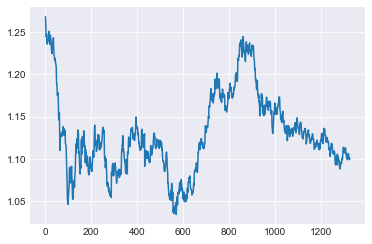

In [22]:
X=data.as_matrix(columns=['Low'])
low=np.reshape(X,1328)
plt.plot(low)

In [23]:
tau = 1.0
with pm.Model() as arlow:
    beta = pm.Normal('beta', mu=0, sigma=tau)
    likelihood = pm.AR('likelihood', beta, sigma=1.0, observed=low)

In [24]:
with arlow:
    trace = pm.sample(1000, tune=4000, cores=4)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta]
Sampling 4 chains, 0 divergences: 100%|██████████| 20000/20000 [00:18<00:00, 1078.96draws/s]


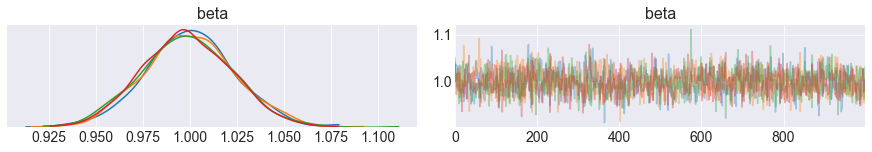

In [16]:
az.plot_trace(trace);

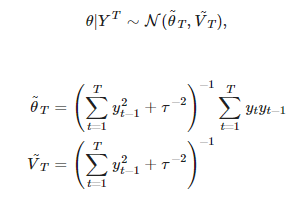

the above mentioned formulas are for calculating the mean and variance for beta variable

In [25]:
lmup = ((low[:-1]**2).sum() + tau**-2)**-1 * np.dot(low[:-1],low[1:])
lVp =  ((low[:-1]**2).sum() + tau**-2)**-1

print('Mean: {:5.3f} (numerically calculated = {:5.3f})'.format(trace['beta'].mean(), lmup))
print('Std: {:5.3f} (numerically calculated = {:5.3f})'.format(trace['beta'].std(), np.sqrt(lVp)))

Mean: 0.999 (numerically calculated = 0.999)
Std: 0.025 (numerically calculated = 0.024)


# applying process to open variable 

C:\Users\DELL\Anaconda3\envs\pp\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


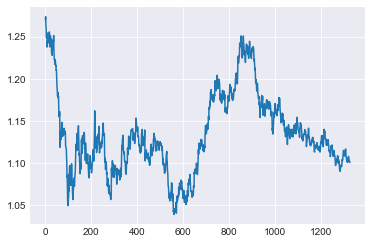

In [5]:
X=data.as_matrix(columns=['Open'])
oopen=np.reshape(X,1328)
plt.plot(oopen)

# beta prior as flat

In [12]:
tau = 1.0
with pm.Model() as aropen:
    beta = pm.Flat('beta')
    likelihood = pm.AR('likelihood', beta, sigma=1.0, observed=oopen)

In [13]:
with aropen:
    trace = pm.sample(1000, tune=4000, cores=4)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta]
Sampling 4 chains, 0 divergences: 100%|██████████| 20000/20000 [00:17<00:00, 1167.87draws/s]


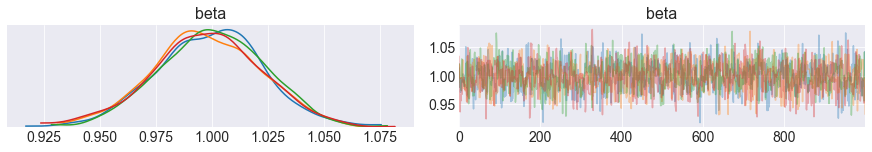

In [22]:
az.plot_trace(trace);

In [23]:
omup = ((oopen[:-1]**2).sum() + tau**-2)**-1 * np.dot(oopen[:-1],oopen[1:])
oVp =  ((oopen[:-1]**2).sum() + tau**-2)**-1

print('Mean: {:5.3f} (exact = {:5.3f})'.format(trace['beta'].mean(), omup))
print('Std: {:5.3f} (exact = {:5.3f})'.format(trace['beta'].std(), np.sqrt(oVp)))

Mean: 0.999 (exact = 0.999)
Std: 0.024 (exact = 0.024)


# beta prior as Half normal

In [19]:
tau = 1.0
with pm.Model() as aropen:
    beta = pm.HalfNormal('beta', sigma = tau)
    likelihood = pm.AR('likelihood', beta, sigma=1.0, observed=oopen)

In [21]:
with aropen:
    trace = pm.sample(1000, tune=4000, cores=4)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta]
Sampling 4 chains, 0 divergences: 100%|██████████| 20000/20000 [00:15<00:00, 1256.80draws/s]
The acceptance probability does not match the target. It is 0.6772398119200103, but should be close to 0.8. Try to increase the number of tuning steps.


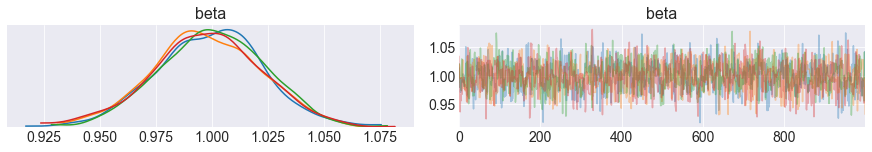

In [24]:
az.plot_trace(trace);

In [25]:
omup = ((oopen[:-1]**2).sum() + tau**-2)**-1 * np.dot(oopen[:-1],oopen[1:])
oVp =  ((oopen[:-1]**2).sum() + tau**-2)**-1

print('Mean: {:5.3f} (exact = {:5.3f})'.format(trace['beta'].mean(), omup))
print('Std: {:5.3f} (exact = {:5.3f})'.format(trace['beta'].std(), np.sqrt(oVp)))

Mean: 0.999 (exact = 0.999)
Std: 0.024 (exact = 0.024)


# applying model on percentage change

C:\Users\DELL\Anaconda3\envs\pp\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


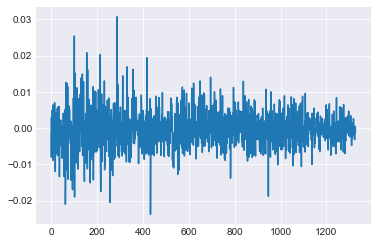

In [26]:
X=data.as_matrix(columns=['per_change'])
change=np.reshape(X,1328)
plt.plot(change)

In [31]:
tau = 1.0
with pm.Model() as archange:
    beta = pm.Flat('beta')
    likelihood = pm.AR('likelihood', beta, sigma=1.0, observed=change)

In [32]:
with archange:
    trace = pm.sample(1000, tune=4000, cores=4)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta]
Sampling 4 chains, 0 divergences: 100%|██████████| 20000/20000 [00:15<00:00, 1268.17draws/s]


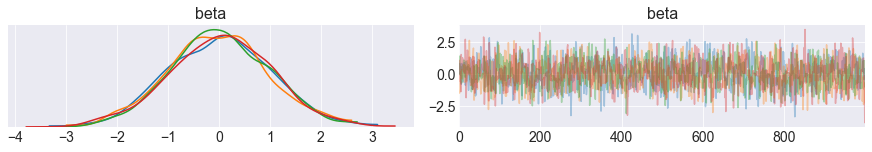

In [29]:
az.plot_trace(trace);

In [30]:
tau = 1.0
with pm.Model() as archange:
    beta = pm.Normal('beta',mu=0, sigma = tau)
    likelihood = pm.AR('likelihood', beta, sigma=1.0, observed=change)

In [36]:
with archange:
    trace = pm.sample(1000, tune=4000, cores=4)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta]
Sampling 4 chains, 0 divergences: 100%|██████████| 20000/20000 [00:17<00:00, 1130.69draws/s]
The acceptance probability does not match the target. It is 0.8866887337220231, but should be close to 0.8. Try to increase the number of tuning steps.


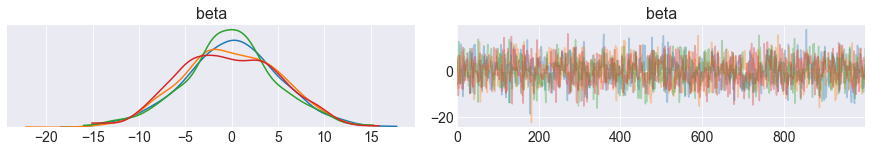

In [31]:
az.plot_trace(trace);

In [27]:
cmup = ((change[:-1]**2).sum() + tau**-2)**-1 * np.dot(change[:-1],change[1:])
cVp =  ((change[:-1]**2).sum() + tau**-2)**-1

print('Mean: {:5.3f} (exact = {:5.3f})'.format(trace['beta'].mean(), cmup))
print('Std: {:5.3f} (exact = {:5.3f})'.format(trace['beta'].std(), np.sqrt(cVp)))

Mean: 0.000 (exact = -0.001)
Std: 1.000 (exact = 0.982)


        Date   Price    Open    High     Low Change %
0   4-Dec-19  1.1079  1.1082  1.1085  1.1076   -0.02%
1   3-Dec-19  1.1082  1.1076  1.1093  1.1066    0.02%
2   2-Dec-19  1.1079  1.1014  1.1091  1.1003    0.56%
3  29-Nov-19  1.1017  1.1009  1.1030  1.0981    0.07%
4  28-Nov-19  1.1009  1.0999  1.1020  1.0999    0.09%
